<a href="https://colab.research.google.com/github/yfhkucing/regression_bms/blob/master/heatmap_with_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 79.9 MB 1.2 MB/s 


In [ ]:
import joblib
import numpy as np
import pandas as pd

In [ ]:
! unzip /content/models.zip

Archive:  /content/models.zip
   creating: content/models/
  inflating: content/models/model 151  
  inflating: content/models/model 33  
  inflating: content/models/model 150  
  inflating: content/models/model 77  
  inflating: content/models/model 143  
  inflating: content/models/model 116  
  inflating: content/models/model 72  
  inflating: content/models/model 152  
  inflating: content/models/model 79  
  inflating: content/models/model 68  
  inflating: content/models/model 153  
  inflating: content/models/model 82  
  inflating: content/models/model 66  
  inflating: content/models/model 58  
  inflating: content/models/model 42  
  inflating: content/models/model 107  
  inflating: content/models/model 15  
  inflating: content/models/model 73  
  inflating: content/models/model 11  
  inflating: content/models/model 45  
  inflating: content/models/model 8  
  inflating: content/models/model 76  
  inflating: content/models/model 128  
  inflating: content/models/model 109

In [ ]:
df=pd.read_excel('data_big.xlsx',sheet_name='Sheet2')
df=df.drop(['source','ACH_jendela','ACH_fan','ACH_total'],axis=1)
df.head()

,koor_x,koor_y,koor_z,Vx,Vy,Vz,Temp,Jendela,AC,sudut angin,Nilai Kecepatan Angin,Dry Bulb Temperature,Fan 1,Fan 2,Fan 3
0,1,6,18,0.003601,-0.061728,0.013407,27.235806,0,0,171,0.5,27.0,0,0,0
1,1,16,18,0.003154,-0.069276,0.003700,27.362558,0,0,171,0.5,27.0,0,0,0
2,1,30,18,0.002399,-0.073255,-0.000751,27.417225,0,0,171,0.5,27.0,0,0,0
3,1,45,18,0.002273,-0.074632,-0.001710,27.410238,0,0,171,0.5,27.0,0,0,0
4,1,63,18,0.002269,-0.075449,-0.001600,27.366829,0,0,171,0.5,27.0,0,0,0


In [ ]:
array_x = []

for i in range(154):
  frame= df[i::154]
  frame = frame.drop(['koor_x','koor_y','koor_z'],axis=1)
  frame = frame.drop(['Vx','Vy','Vz','Temp'],axis=1)
  array_x.append(frame)

In [ ]:
array_y = []

for i in range(154):
  frame= df[i::154]
  frame = frame.drop(['koor_x','koor_y','koor_z',],axis=1)
  frame = frame.drop(['Jendela','AC','sudut angin','Nilai Kecepatan Angin','Dry Bulb Temperature','Fan 1','Fan 2','Fan 3'],axis=1)
  array_y.append(frame)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

skor_r2=[]
mae_=[]
rmse = []
y_predict = []
for i in range(154):
  x = array_x[i]
  y = array_y[i]
  model = joblib.load(f'/content/content/models/model {i}')
  y_pred = model.predict(x)
  Skor_r2 = r2(y,y_pred)
  RMSE = mse(y,y_pred,squared=False)
  MAE = mae(y,y_pred)
  y_predict.append(y_pred)
  skor_r2.append(Skor_r2)
  mae_.append(MAE)
  rmse.append(RMSE)

In [ ]:
skor_r2 = np.array(skor_r2)
rmse = np.array(rmse)
mae_=np.array(mae_)
y_predict = np.array(y_predict)
y = np.array(array_y)

In [ ]:
r2_matrix = skor_r2.reshape(11,14)
rmse_matrix = rmse.reshape(11,14)
mae_matrix = mae_.reshape(11,14)

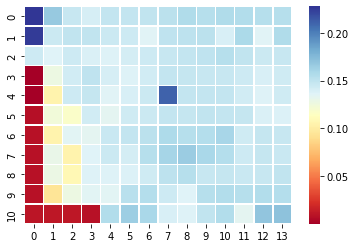

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

ax = sns.heatmap(r2_matrix, linewidth=0.5, cmap="RdYlBu")
plt.show()

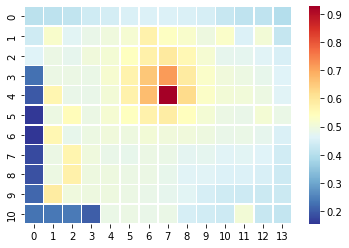

In [ ]:
bx = sns.heatmap(rmse_matrix, linewidth=0.5, cmap="RdYlBu_r")
plt.show()

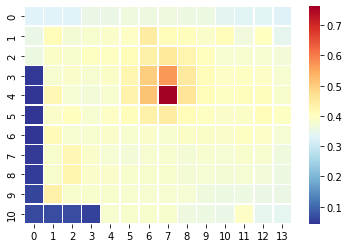

In [ ]:
bx = sns.heatmap(mae_matrix, linewidth=0.5, cmap="RdYlBu_r")
plt.show()

In [55]:
scenarios = 15   #0-28
indexing = 3    #0-3

In [56]:
a = y[(...,scenarios,indexing)]
b = y_predict[(...,scenarios,indexing)]
#a = np.array(a)
#b = np.array(b)
print('reshaped')

reshaped


In [ ]:
df_koor_x = pd.DataFrame(df['koor_x'])
df_koor_y = pd.DataFrame(df['koor_y'])
df_koor_z = pd.DataFrame(df['koor_z'])
df_koor = df_koor_x.join(df_koor_y)
df_koor = df_koor.join(df_koor_z)

In [ ]:
def suhu(y):
  df_y = pd.DataFrame(y)
  df_z = pd.DataFrame(y)
  df_z.rename(columns={0:1},inplace=True)
  df_y = df_y.join(df_z)
  df_y = df_y.join(df_koor)
  df_y.rename(columns={0:'Vx',1:'suhu'},inplace=True)
  df_y.pop('Vx')
  return df_y

In [ ]:
import plotly.graph_objects as go
def heatmap (a):
  fig = go.Figure(data =
    go.Contour(
        z = a['suhu'].tolist(),
        x = a['koor_x'].tolist(),
        y = a['koor_y'].tolist()
    ))
  return fig

In [ ]:
! mkdir actual
! mkdir predicted

In [68]:
! mkdir subplot

In [72]:
from plotly.subplots import make_subplots
for i in range(192):
  a = y[(...,i,indexing)]
  b = y_predict[(...,i,indexing)]
  a = np.array(a)
  b = np.array(b)
  a = suhu(a)
  b = suhu(b)
  
  fig = make_subplots(rows=1, cols=2)

  fig.add_contour(
     z = a['suhu'].tolist(),
     x = a['koor_x'].tolist(),
     y = a['koor_y'].tolist(),
     row=1, col=1
  )

  fig.add_contour(
     z = b['suhu'].tolist(),
     x = b['koor_x'].tolist(),
     y = b['koor_y'].tolist(),
     row=1, col=2
  )
  fig.write_image(f'/content/subplot/fig {i}.png')

In [ ]:
!zip -r /content/subplot.zip /content/subplot